# "지하철 유무임별 이용현황" 데이터 사용

## 파일 불러오기

### 이름 & 파일 형식 바꾸기
데이터를 편하게 불러오기 위해 이름과 파일 형식을 바꿈
- 파일 이름 : 2023년 03월  교통카드 통계자료 -> subway
- 파일 형식 : xls -> csv

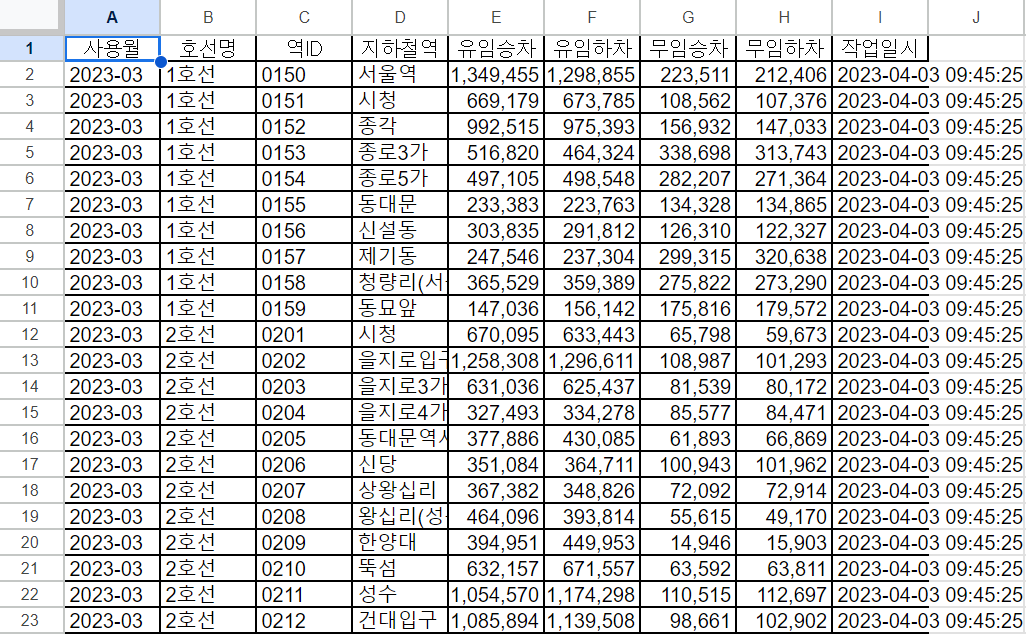

데이터를 잘 처리하기 위해 ' , '와 지하철 유무임별 이용현황 외의 다른 시트, 사용하지 않을 데이터인 '작업일시' 열을 지우도록 함

[ , 바꾸기]
1. csv 파일 열기
2. Ctrl + F 키 눌러 , 찾기
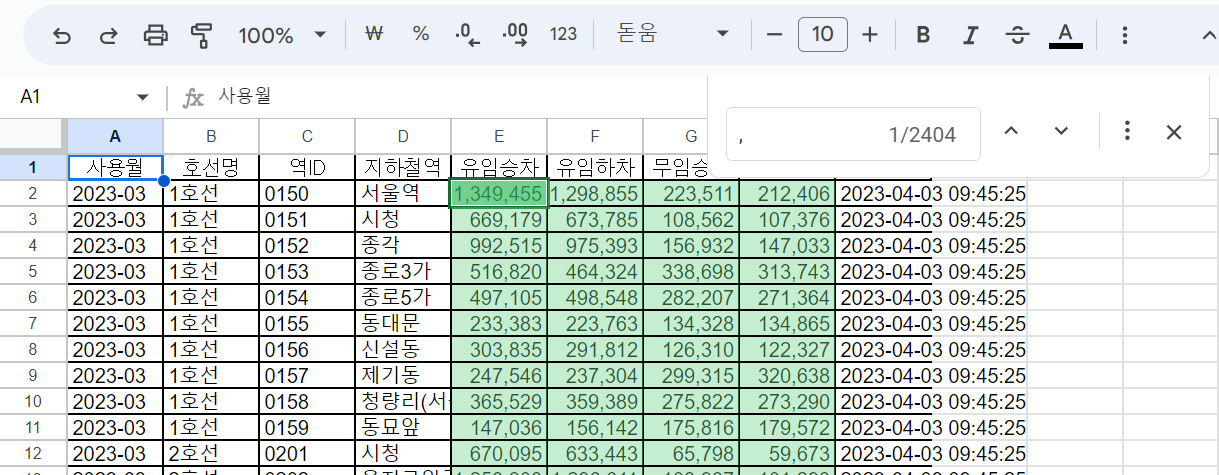
3. ','를 ''로 바꾸기
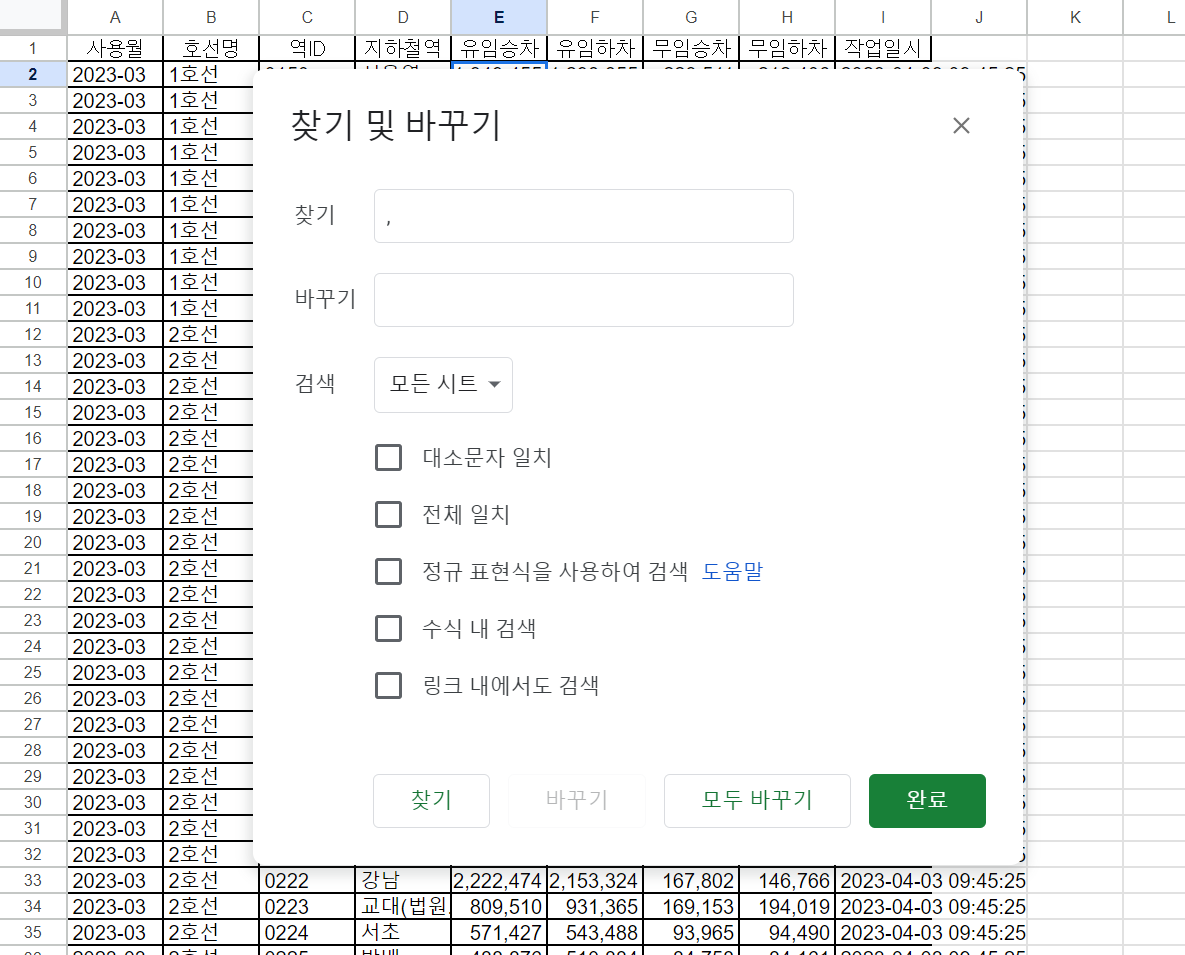
"모두 바꾸기" 클릭

[지하철 유무임별 이용현황 외의 다른 시트 삭제]
1. 지하철 유무임별 이용현황 외의 다른 시트를 우클릭하고 '삭제' 클릭
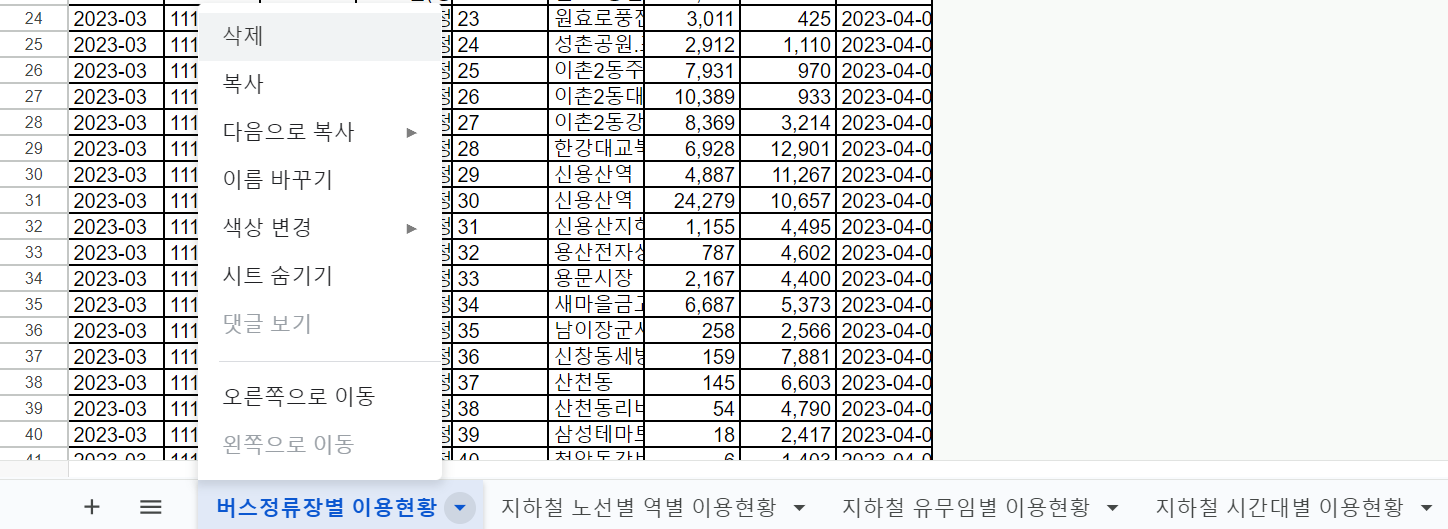

[ 작업일시 열 삭제 ]
1. I열을 우클릭한 후 열 삭제 누르기

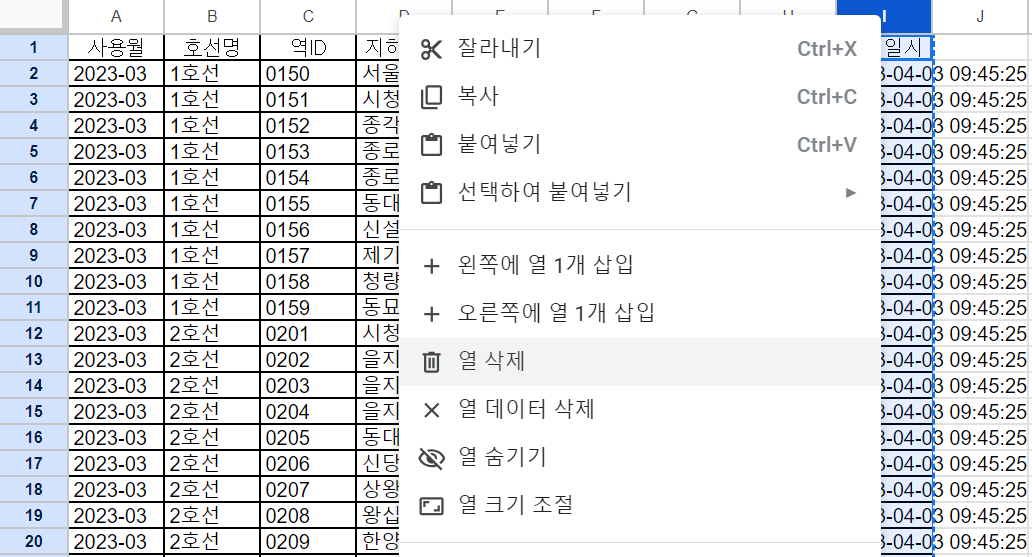


### 파일 불러오기

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


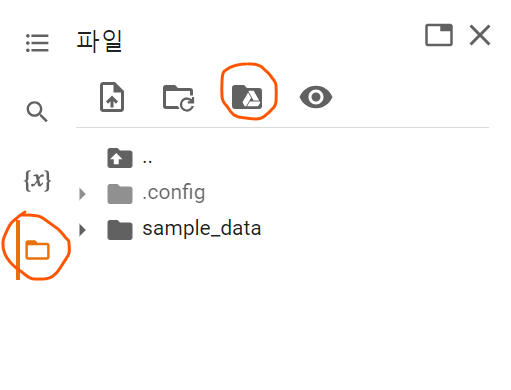
<br/>왼쪽 파일 이미지 클릭 후, 오른쪽 파일 이미지 클릭
<br/>-> 드라이브 마운트 완료

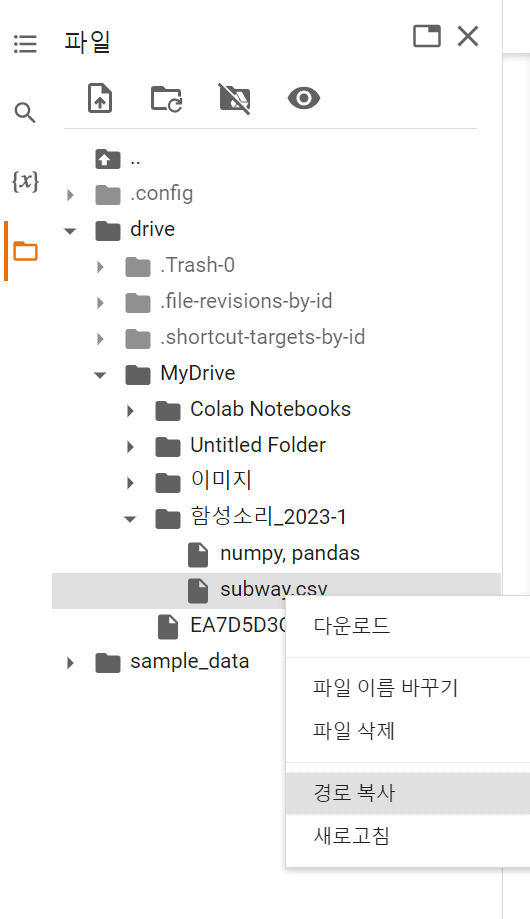

In [19]:
# 구글 스프레드시트로 하다가 안 읽혀서 csv파일로 변환 후 읽음

import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/함성소리_2023-1/subway.csv')
df

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차
0,2023-03,1호선,150,서울역,1349455,1298855,223511,212406
1,2023-03,1호선,151,시청,669179,673785,108562,107376
2,2023-03,1호선,152,종각,992515,975393,156932,147033
3,2023-03,1호선,153,종로3가,516820,464324,338698,313743
4,2023-03,1호선,154,종로5가,497105,498548,282207,271364
...,...,...,...,...,...,...,...,...
612,2023-03,신림선,4407,당곡,95648,93488,36834,36365
613,2023-03,신림선,4408,신림,35761,54139,15762,18859
614,2023-03,신림선,4409,서원,79441,63911,23235,23014
615,2023-03,신림선,4410,서울대벤처타운,211830,190648,64100,64005


## 데이터 다루기

### 지하철 유무임별 이용현황 데이터 살펴보기

In [20]:
df.head()

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차
0,2023-03,1호선,150,서울역,1349455,1298855,223511,212406
1,2023-03,1호선,151,시청,669179,673785,108562,107376
2,2023-03,1호선,152,종각,992515,975393,156932,147033
3,2023-03,1호선,153,종로3가,516820,464324,338698,313743
4,2023-03,1호선,154,종로5가,497105,498548,282207,271364


In [5]:
df.tail()

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차
612,2023-03,신림선,4407,당곡,95648,93488,36834,36365
613,2023-03,신림선,4408,신림,35761,54139,15762,18859
614,2023-03,신림선,4409,서원,79441,63911,23235,23014
615,2023-03,신림선,4410,서울대벤처타운,211830,190648,64100,64005
616,2023-03,신림선,4411,관악산(서울대),66794,71624,37582,38637


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용월     617 non-null    object
 1   호선명     617 non-null    object
 2   역ID     617 non-null    int64 
 3   지하철역    617 non-null    object
 4   유임승차    617 non-null    int64 
 5   유임하차    617 non-null    int64 
 6   무임승차    617 non-null    int64 
 7   무임하차    617 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 38.7+ KB


In [6]:
df.loc[:,'역ID']

0       150
1       151
2       152
3       153
4       154
       ... 
612    4407
613    4408
614    4409
615    4410
616    4411
Name: 역ID, Length: 617, dtype: int64

In [7]:
df.loc[:,['유임승차', '유임하차']]

,유임승차,유임하차
0,1349455,1298855
1,669179,673785
2,992515,975393
3,516820,464324
4,497105,498548
...,...,...
612,95648,93488
613,35761,54139
614,79441,63911
615,211830,190648


In [8]:
df.loc[[0,4], ['사용월', '역ID']]

,사용월,역ID
0,2023-03,150
4,2023-03,154


여기서 퀴즈! 전체 행과 유임승차부터 무임하차까지의 열을 나타내려면?



In [9]:
df.loc[:, '유임승차':'무임하차']

,유임승차,유임하차,무임승차,무임하차
0,1349455,1298855,223511,212406
1,669179,673785,108562,107376
2,992515,975393,156932,147033
3,516820,464324,338698,313743
4,497105,498548,282207,271364
...,...,...,...,...
612,95648,93488,36834,36365
613,35761,54139,15762,18859
614,79441,63911,23235,23014
615,211830,190648,64100,64005


In [13]:
pd.DataFrame(df['지하철역'].value_counts())

,지하철역
서울역,5
김포공항,4
공덕,4
종로3가,3
동대문역사문화공원(DDP),3
...,...
정왕,1
신길온천,1
안산,1
초지,1


### 1. 유임 승차 비율이 가장 높은 역은 어디일까?

유임승차비율 = 유임승차인원 / 무임승차인원

In [14]:
df1 = df.copy()

In [15]:
df1['유임승차비율'] = df1['유임승차']/df1['무임승차']
df1.head()

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,유임승차비율
0,2023-03,1호선,150,서울역,1349455,1298855,223511,212406,6.037533
1,2023-03,1호선,151,시청,669179,673785,108562,107376,6.164026
2,2023-03,1호선,152,종각,992515,975393,156932,147033,6.324491
3,2023-03,1호선,153,종로3가,516820,464324,338698,313743,1.525902
4,2023-03,1호선,154,종로5가,497105,498548,282207,271364,1.761491


In [16]:
# 유임승차비율 오름차순 정렬
df1.sort_values('유임승차비율')

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,유임승차비율
326,2023-03,경의선,1286,운천,70,40,145,139,0.482759
208,2023-03,경원선,1916,소요산,32799,26029,61517,55355,0.533170
346,2023-03,경춘선,1324,굴봉산,1625,1748,2331,2223,0.697126
296,2023-03,중앙선,1220,지평,872,1268,1134,1158,0.768959
7,2023-03,1호선,157,제기동,247546,237304,299315,320638,0.827042
...,...,...,...,...,...,...,...,...,...
332,2023-03,경의선,1296,계양,6,0,0,0,inf
237,2023-03,분당선,1031,복정,15,0,0,0,inf
441,2023-03,6호선,2615,연신내,23,0,0,0,inf
522,2023-03,7호선,2760,굴포천,1,0,0,0,inf


In [17]:
df1.sort_values('유임승차비율', ascending=False)

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,유임승차비율
520,2023-03,7호선,2757,부천시청,3,0,0,0,inf
237,2023-03,분당선,1031,복정,15,0,0,0,inf
518,2023-03,7호선,2753,까치울,1,0,0,0,inf
332,2023-03,경의선,1296,계양,6,0,0,0,inf
441,2023-03,6호선,2615,연신내,23,0,0,0,inf
...,...,...,...,...,...,...,...,...,...
7,2023-03,1호선,157,제기동,247546,237304,299315,320638,0.827042
296,2023-03,중앙선,1220,지평,872,1268,1134,1158,0.768959
346,2023-03,경춘선,1324,굴봉산,1625,1748,2331,2223,0.697126
208,2023-03,경원선,1916,소요산,32799,26029,61517,55355,0.533170


무임승차인원이 0인 값이 있어서 inf 값 발생!<br/><br/>
여러 개 호선이 환승이 가능한 역의 경우 별도의 데이터 집계 방법이 있을 듯 하나,<br/>
우리는 그 방법을 정확히 알지 못하므로 <br/>
유임하차, 무임하차 값이 0인 데이터를 어떻게 다룰지 고민해야 함

**rate = 유임승차인원 / 전체인원 (유임승차인원+무임승차인원)
<br/>  *조건 : 유무임 승차 인원 >= 100,000명**

In [23]:
# 조건 적용
df1['전체승차'] = df1['유임승차']+df1['무임승차']
df1 = df1[df1['전체승차']>=100000]
df1.head()

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,유임승차비율,전체승차
0,2023-03,1호선,150,서울역,1349455,1298855,223511,212406,6.037533,1572966
1,2023-03,1호선,151,시청,669179,673785,108562,107376,6.164026,777741
2,2023-03,1호선,152,종각,992515,975393,156932,147033,6.324491,1149447
3,2023-03,1호선,153,종로3가,516820,464324,338698,313743,1.525902,855518
4,2023-03,1호선,154,종로5가,497105,498548,282207,271364,1.761491,779312


In [25]:
# 유임승차비율 구하기
df1['유임승차비율'] = df1['유임승차']/(df1['유임승차']+df1['무임승차'])
df1.head()

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,유임승차비율,전체승차
0,2023-03,1호선,150,서울역,1349455,1298855,223511,212406,0.857905,1572966
1,2023-03,1호선,151,시청,669179,673785,108562,107376,0.860414,777741
2,2023-03,1호선,152,종각,992515,975393,156932,147033,0.863472,1149447
3,2023-03,1호선,153,종로3가,516820,464324,338698,313743,0.604102,855518
4,2023-03,1호선,154,종로5가,497105,498548,282207,271364,0.637877,779312


In [26]:
# 유임승차비율 오름차순 정렬
df1.sort_values('유임승차비율', ascending=False).head()

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,유임승차비율,전체승차
18,2023-03,2호선,209,한양대,394951,449953,14946,15903,0.963537,409897
568,2023-03,공항철도 1호선,4203,홍대입구,402194,400956,20549,18734,0.951391,422743
48,2023-03,2호선,239,홍대입구,2027453,2165965,104002,100607,0.951206,2131455
120,2023-03,경부선,1001,서울역,258873,77870,15954,3463,0.941949,274827
570,2023-03,공항철도 1호선,4206,마곡나루(서울식물원),276157,267198,17742,18250,0.939632,293899


위 결과를 통해, 젊은 사람들이 많이 모이는 곳으로 알려진 장소가 대부분이라는 것을 알 수 있다. 평소에 들어보지 못한 낯선 역이라도 연령대가 낮은 사람들이 몰리는 곳임을 예측할 수 있다.

### 2. 유무임 승하차 인원이 가장 많은 역 찾기

In [27]:
df.sort_values('유임승차', ascending=False).head()

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차
31,2023-03,2호선,222,강남,2222474,2153324,167802,146766
25,2023-03,2호선,216,잠실(송파구청),2092005,2080087,227110,216735
48,2023-03,2호선,239,홍대입구,2027453,2165965,104002,100607
41,2023-03,2호선,232,구로디지털단지,1545127,1529539,197470,198586
39,2023-03,2호선,230,신림,1534995,1477009,213710,210944


In [28]:
df.sort_values('유임하차', ascending=False).head()

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차
48,2023-03,2호선,239,홍대입구,2027453,2165965,104002,100607
31,2023-03,2호선,222,강남,2222474,2153324,167802,146766
25,2023-03,2호선,216,잠실(송파구청),2092005,2080087,227110,216735
41,2023-03,2호선,232,구로디지털단지,1545127,1529539,197470,198586
30,2023-03,2호선,221,역삼,1299415,1509438,156648,160097


In [29]:
df.sort_values('무임승차', ascending=False).head()

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차
3,2023-03,1호선,153,종로3가,516820,464324,338698,313743
7,2023-03,1호선,157,제기동,247546,237304,299315,320638
125,2023-03,경부선,1006,영등포,1021094,1055715,291568,291390
4,2023-03,1호선,154,종로5가,497105,498548,282207,271364
62,2023-03,3호선,311,연신내,812751,768050,276984,266381


In [30]:
df.sort_values('무임하차', ascending=False).head()

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차
7,2023-03,1호선,157,제기동,247546,237304,299315,320638
3,2023-03,1호선,153,종로3가,516820,464324,338698,313743
125,2023-03,경부선,1006,영등포,1021094,1055715,291568,291390
8,2023-03,1호선,158,청량리(서울시립대입구),365529,359389,275822,273290
4,2023-03,1호선,154,종로5가,497105,498548,282207,271364


2023년 3월 데이터 기준
</br>유임승차 : 강남 2호선 (2,222,474명)
</br>유임하차 : 홍대입구 2호선 (2,165,965명)
</br>무임승차 : 종로3가 1호선 (338,698명)
</br>무임하차 : 제기동 1호선 (320,638명)

# 지하철 시간대별 데이터 시각화하기

### "지하철 시간대별 이용현황" 데이터 사용

### 데이터를 편하게 불러오기 위해 이름과 파일 형식을 바꿈
- 파일 이름 : 2023년 03월  교통카드 통계자료 -> subwaytime
- 파일 형식 : xls -> csv

데이터를 잘 처리하기 위해 ' , '와 지하철 시간대별 이용현황 외의 다른 시트, 사용하지 않을 데이터인 '작업일시' 열을 지워 데이터를 정제

1. 작업일시 삭제

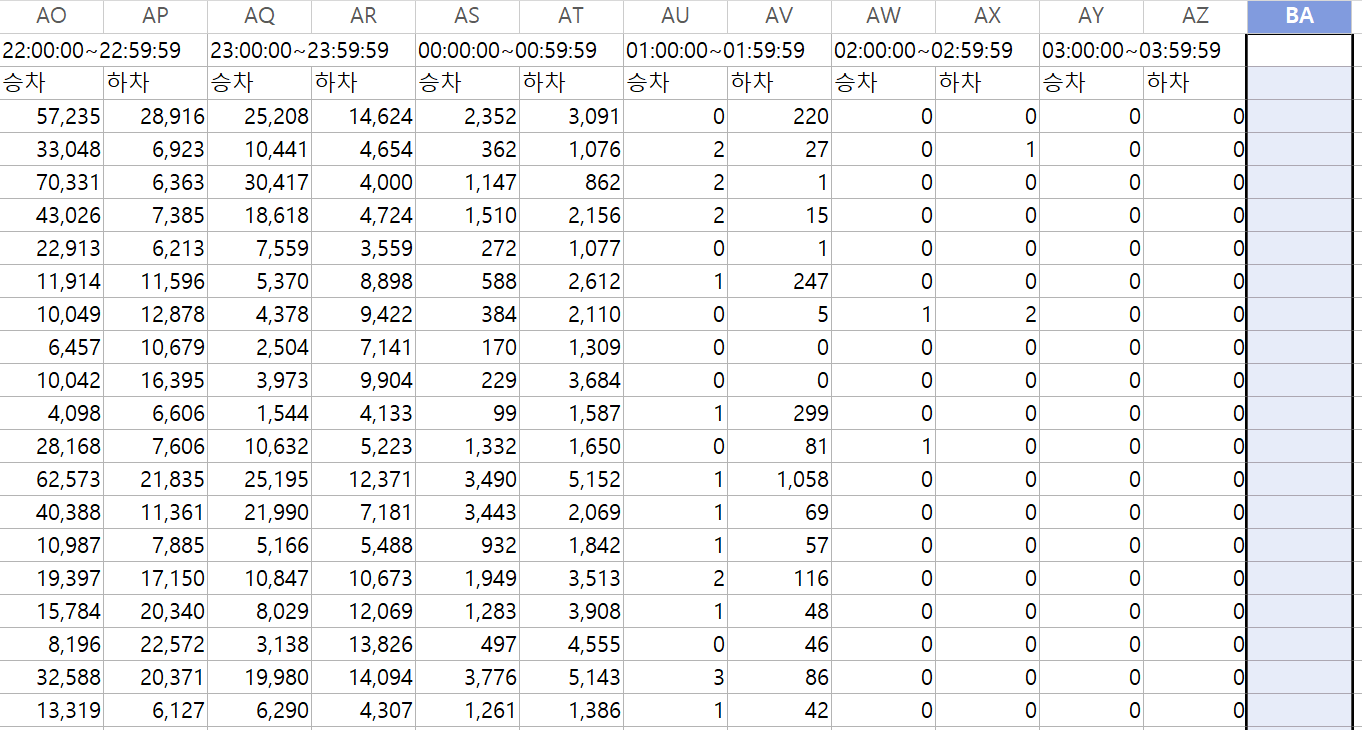

2. ','를 ''로 변경

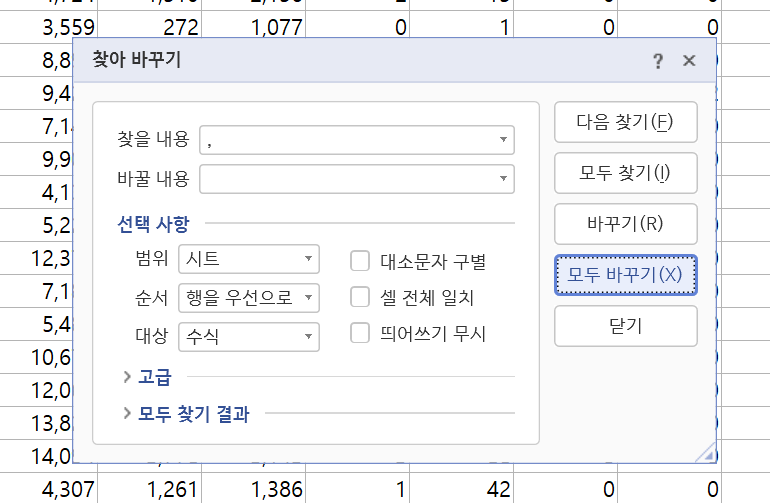

### 1. 지하철 시간대별 이용 현황 데이터 정제하기

In [ ]:
# 파일 읽어오기(head함수를 사용하면 5개의 행을 불러)
# 한글을 제대로 읽을 수 없는 오류로 인해 encoding을 작성해줌

df2 = pd.read_csv('/content/drive/MyDrive/subwaytime.csv',  encoding='cp949')
df2.head()

In [ ]:
df2.tail()

In [ ]:
df3= df2.drop([0])

In [ ]:
df3.loc[:,['호선명', '지하철역']]

In [ ]:
df3.iloc[:, 4:] = df3.iloc[:, 4:].apply(lambda x: x.str.replace(',', ''), axis=1).apply(pd.to_numeric, errors='coerce', axis=1)

In [ ]:
df3.info()

### 2. 출근 시간대 사람들이 가장 많이 타고 내리는 역은 어디일까

아침 7시 승차 데이터의 위치 -> 10번 인덱스에 있음

In [ ]:
# 10번 인덱스의 데이터 추출하여 리스트에 저장

result = df3.iloc[:,10]
result

In [ ]:
# 막대그래프로 시각화

import matplotlib.pyplot as plt
plt.bar(range(len(result)), result)
plt.show()

In [ ]:
# 오름차순으로 정렬한 후 시각화

result=result.sort_values()  # 오름차순으로 정렬
plt.bar(range(len(result)), result)
plt.show()

한 역만 다른 역과 엄청나게 큰 차이를 가지고 있고 나머지 역은 그것보다 훨씬 더 적은 인원을 가지고 있음을 알 수 있다.
이번에는 7~9시의 승차 인원을 합쳐보자

In [ ]:
# 7~9시의 열 선택
selected_columns = df3.iloc[:, [10, 12, 14]]

# 선택된 칼럼의 합을 오름차순 정렬 후 시각화
sum_of_columns = selected_columns.sum(axis=1)
sum_of_columns = sum_of_columns.sort_values()
sum_of_columns.plot(kind='bar')
plt.show()

그래프의 형태가 크게 다르지 않기에 이번에는 '최대값'을 찾아보자.

In [ ]:
mx = sum_of_columns.max()
mx_station = df3.iloc[sum_of_columns.idxmax(), 3] + '(' + df3.iloc[sum_of_columns.idxmax(), 1]+')'

print(mx_station, mx)

In [ ]:
all_sub = df3.iloc[:, 4:]

sum_of_all = all_sub.sum(axis=1)
mx1 = sum_of_all.max()
mx_station1 = df3.iloc[sum_of_all.idxmax(), 3] + '(' + df3.iloc[sum_of_all.idxmax(), 1]+')'

print(mx_station1, mx1)

정답은 교대역이었음!

### 3. 밤 11시에 사람들이 가장 많이 타는 역은 어디일까

밤 11시의 데이터는 몇번째 인덱스에 있을까?
승차 시각이 1시간씩 늦어질 때마다 인덱스가 2씩 늘어나며, 승차를 시작하는 시각은 4임.


승차 시각:t, 인덱스:i

i = 4+(t-4)*2

In [ ]:
t = int(input('몇 시의 승차 인원이 가장 많은 역이 궁금하세요? : '))

selected_column = df3.iloc[:, 4 + (t - 4) * 2]

mx = selected_column.max()
mx_station = df3.iloc[selected_column.idxmax(), 3] + '(' + df3.iloc[selected_column.idxmax(), 1] + ')'

print(mx_station, mx)


### 4. 시간대별로 사람들이 가장 많이 타고 내리는 역은 어디일까



시간대별로 데이터를 저장할 리스트를 만들어 시간대별로 승차 인원이 가장 많은 역의 이름과 인원을 한눈에 파악할 수 있는 그래프를 만들어보자

24시간이므로 range(24)를 사용할 수 있고 i= j*2+4를 사용하여 반복할 변수를 만들 수 있다.

In [ ]:
mx = [0] * 24
mx_station = [''] * 24

df3.iloc[:, 4:] = df3.iloc[:, 4:].apply(pd.to_numeric)

for j in range(24):
    mx[j] = df3.iloc[:, j * 2 + 4].max()
    mx_station[j] = df3.iloc[df3.iloc[:, j * 2 + 4].idxmax(), 3]

print(mx_station)
print(mx)

In [ ]:
plt.rc('font', family='DejaVu Sans')
plt.bar(range(24), mx)
plt.xticks(range(24), mx_station, rotation=90)
plt.show()

In [ ]:
# 시간 추가

mx = [0] * 24
mx_station = [''] * 24

df3.iloc[:, 4:] = df3.iloc[:, 4:].apply(pd.to_numeric)

for j in range(24):
    mx[j] = df3.iloc[:, j * 2 + 4].max()
    mx_station[j] = df3.iloc[df3.iloc[:, j * 2 + 4].idxmax(), 3] + '(' +str(j+4) +'시)'

plt.rc('font', family='DejaVu Sans')
plt.bar(range(24), mx)
plt.xticks(range(24), mx_station, rotation=90)
plt.show()

In [ ]:
df3.iloc[:, 4:] = df3.iloc[:, 4:].apply(pd.to_numeric)

mx = df3.iloc[:, 4::2].apply(max, axis=0)
idxmax = df3.iloc[:, 4::2].idxmax()
if all(idxmax < len(df3)):
    mx_station = df3.loc[idxmax, 3] + '( ' + pd.Series(range(4, 28)) + ' )'
    plt.rc('font', family='Malgun Gothic')
    plt.bar(range(24), mx, color='b')
    plt.xticks(range(24), mx_station, rotation=90)
    plt.show()
else:
    print("Index out of bounds")

### 5. 모든 지하철역에서 시간대별 승하차 인원을 모두 더하면

모든 지하철역의 시간대별 승하차 인원을 더하면 어떤 결과가 나올까?

In [ ]:
df3.iloc[:, 4:] = df3.iloc[:, 4:].apply(pd.to_numeric)

# 모든 역에 대해 시간대별 승차 인원과 하차 인원을 누적해서 더하자
s_in = df3.iloc[:, 4::2].sum(axis=0)
s_out = df3.iloc[:, 5::2].sum(axis=0)

print(s_in)
print(s_out)

In [ ]:
plt.rc('font', family='DejaVu Sans')
plt.title('지하철 시간대별 승하차 인원 추이')  # 제목 추가
plt.plot(s_in, label='승차')             # 승차 인원을 꺾은선 그래프로 표현
plt.plot(s_out, label='하차')            # 하차 인원을 꺾은선 그래프로 표현
plt.legend()
plt.xticks(range(24), range(4,28))
plt.show()